# Desafio de Data Science - Indicium 

Esse notebook contém o desafio para a vaga Data Scientist na empresa INDICIUM. 
>Candidata: Gabriela Xavier

### O presente notebook é organizado de seguinte modo: 

1. <a href='#number_1'> Definição do problema </a>
2. <a href='#number_2'> Base de dados </a>
3. <a href='#number_3'> Analise de Dados exploratória (EDA) - Análise Univariada </a>
4. <a href='#number_4'> Analise de Dados exploratória (EDA) - Análise Bivariada </a>
5. <a href='#number_5'> Pré Processamento </a>
6. <a href='#number_6'> Aplicação de Machine Learning para predição de Churn </a>

<a id='number_1'></a>
### 1. Definição do problema

Este projeto tem como objetivo prever o churn (abandono de clientes) de um banco de dados ﬁctício 
de uma instituição ﬁnanceira. Para isso são fornecidos dois datasets: um dataset 
chamado Abandono_clientes composto por 10000 linhas e 13 colunas de 
informação (features), sendo uma coluna “Exited” composta por dados binários: 1 se 
o cliente abandonou o banco, 0 se não. O segundo dataset possui 1000 linhas e 12 
colunas e não possui a coluna “Exited”. O objetivo é construir um pipeline de 
Machine Learning que permita prever essa coluna a partir dos dados enviados.

<a id='number_2'></a>
### 2. Base de dados 

In [262]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from scipy.stats import randint, uniform
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt 
from xgboost import plot_importance
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [178]:
# Importing the data
df_abandono = pd.read_csv('abandono_clientes.csv')
df_cliente = pd.read_csv('abandono_teste.csv', sep=';')

In [179]:
df_abandono

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [180]:
df_cliente

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10996,15730373,Starks,531,France,Female,34,10,118306.79,1,1,0,26493.05
996,10997,15716191,Dixon,575,Germany,Male,49,2,136822.70,1,1,0,2487.74
997,10998,15673900,Wilkinson,520,France,Female,74,4,0.00,1,0,0,26742.92
998,10999,15581432,Oatley,675,Spain,Male,23,8,0.00,2,0,0,162342.21


A abordagem consiste em realizar o processamento e análise dos dados. Em seguida, os dados do conjunto df_abandono serão utilizados para treinar um modelo. Esse modelo será empregado para fazer previsões da coluna "Exited" no conjunto de dados df_clientes.

<a id='number_3'></a>
### 3. Exploratory Data Analysis (EDA) - Univariate Analysis

In [181]:
# Aqui observamos se há valores faltantes e as caracteristicas do df
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        1000 non-null   int64  
 1   CustomerId       1000 non-null   int64  
 2   Surname          1000 non-null   object 
 3   CreditScore      1000 non-null   int64  
 4   Geography        1000 non-null   object 
 5   Gender           1000 non-null   object 
 6   Age              1000 non-null   int64  
 7   Tenure           1000 non-null   int64  
 8   Balance          1000 non-null   float64
 9   NumOfProducts    1000 non-null   int64  
 10  HasCrCard        1000 non-null   int64  
 11  IsActiveMember   1000 non-null   int64  
 12  EstimatedSalary  1000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 101.7+ KB


In [217]:
df_abandono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [183]:
# como não há dados faltantes em nenhum df, iremos para as próximas analises
df_abandono.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
95%,9500.05,15803034.30,812.00,60.00,9.00,162711.67,2.00,1.00,1.00,190155.38,1.0
99%,9900.01,15813113.19,850.00,72.00,10.00,185967.99,3.00,1.00,1.00,198069.73,1.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [139]:
df_cliente.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,10500.50,15692735.80,652.19,39.22,4.86,75160.03,1.52,0.68,0.53,101500.36
std,288.82,73135.93,97.94,10.76,2.91,62975.38,0.59,0.47,0.50,57860.88
min,10001.00,15565862.00,366.00,18.00,0.00,0.00,1.00,0.00,0.00,245.50
25%,10250.75,15629655.50,582.00,32.00,2.00,0.00,1.00,0.00,0.00,49099.87
50%,10500.50,15695155.00,656.00,38.00,5.00,97926.72,1.00,1.00,1.00,104081.61
75%,10750.25,15754996.50,719.00,44.00,7.00,128141.97,2.00,1.00,1.00,151514.42
95%,10950.05,15804767.25,828.00,61.00,9.00,158459.28,2.00,1.00,1.00,189732.17
99%,10990.01,15813993.32,850.00,73.01,10.00,185325.05,3.00,1.00,1.00,198314.53
max,11000.00,15815463.00,850.00,91.00,10.00,211520.25,4.00,1.00,1.00,199633.73


A análise comparativa entre os dois datasets, revela uma grande semelhança, especialmente em relação às médias das variáveis, que são bastante similares. Além disso, incluímos os percentis 0.95 e 0.99 na análise para verificar se existiam valores excepcionalmente altos em relação à média. Os resultados obtidos demonstraram consistência entre os datasets, portanto, consideraremos o "dataset_abandono" como o principal para as próximas análises.

- Uma estratégia interessante agora, é fazer uso de histogramas para visualizar a distribuição dos dados com mais eficiência. Ao examinar os histogramas, é possível identificar padrões como modas (picos), assimetria (viés para a direita ou esquerda) e presença de valores atípicos. Essas informações podem ajudar a compreender melhor a natureza dos dados e orientar as análises subsequentes.

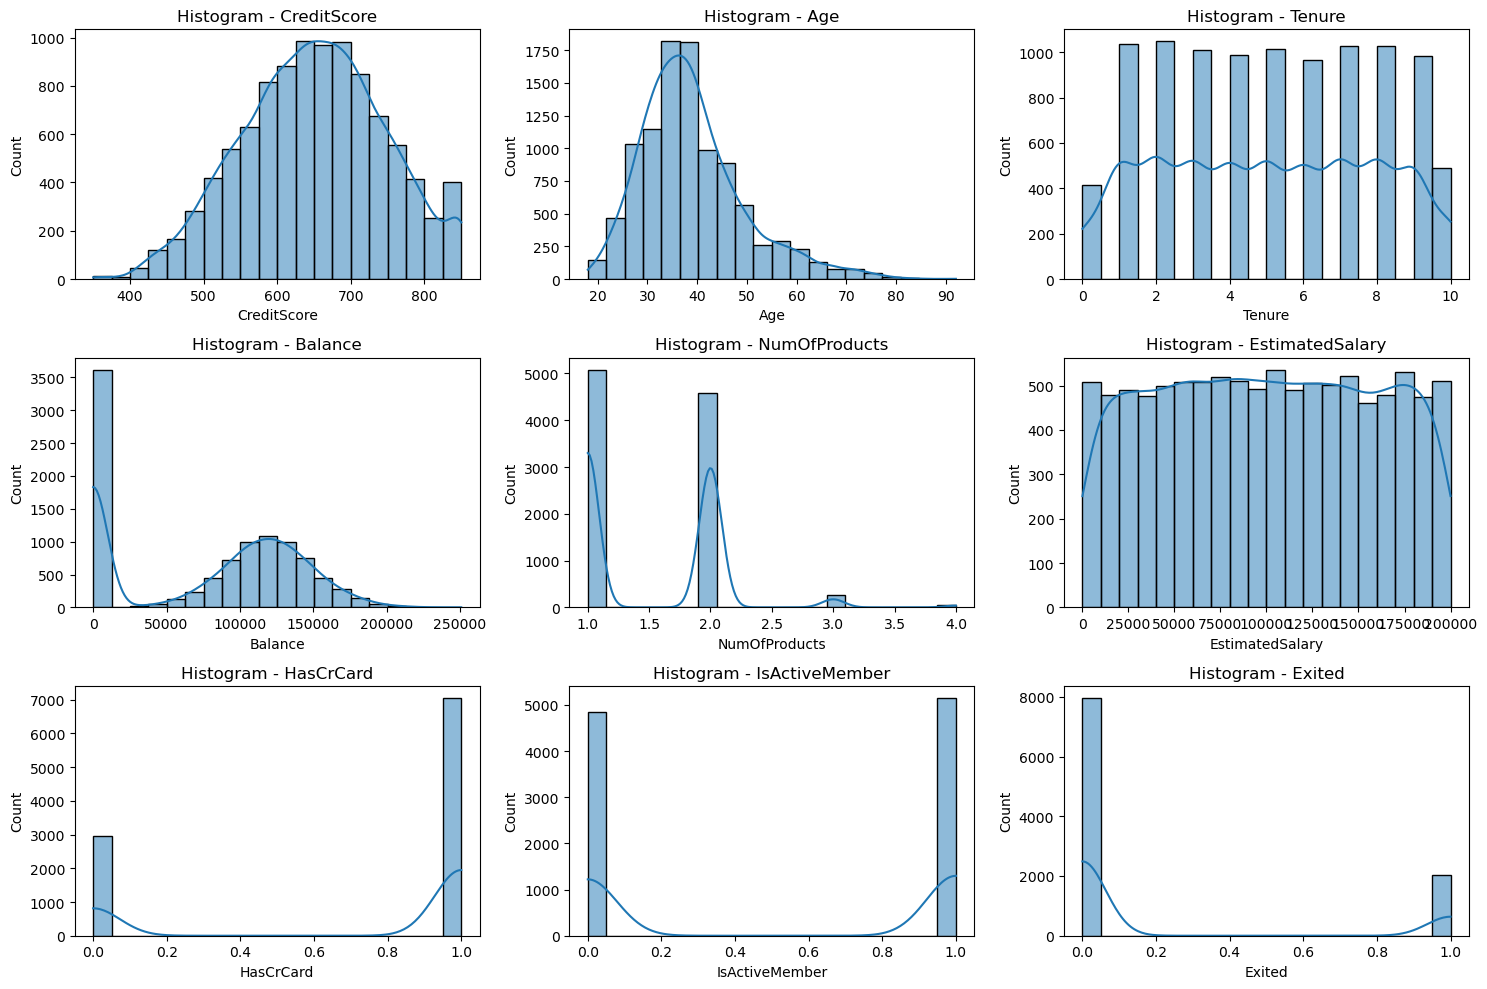

In [140]:
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
           'HasCrCard', 'IsActiveMember', 'Exited']
num_columns = len(columns)

fig, axes = plt.subplots(3, num_columns//3, figsize=(15, 10))

for i, column in enumerate(columns):
    row = i // (num_columns // 3)
    col = i % (num_columns // 3)
    sns.histplot(data=df_abandono, x=column, bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title('Histogram - {}'.format(column))

plt.tight_layout()
plt.show()


Com relação aos histogramas do projeto em questão:

* CreditScore: O histograma do Score de Crédito mostrou uma distribuição bastante dispersa, variando de cerca de 380 a 840, com um pico na faixa de 650. Isso indica que existe uma grande variação nos scores de crédito dos clientes, o que pode ser um indicativo de sua importância como variável para análise.

* Age: No histograma da Idade, observamos uma assimetria à esquerda, indicando que a maioria dos clientes está na faixa adulta, havendo poucos clientes idosos.

* Tenure: O histograma do Tempo de Permanência apresentou um efeito de "platô", sugerindo uma estabilidade na duração dos relacionamentos com o serviço. No entanto, é possível notar uma menor estabilidade nos extremos 0 e 10, indicando que há diferenças significativas de permanência para esses casos.

* Balance: O histograma do Saldo demonstrou um pico na faixa mais baixa, indicando que uma grande parte dos clientes possui um saldo relativamente baixo em suas contas. Isso pode sugerir que esses clientes podem estar utilizando outras contas ou serviços financeiros.

* NumOfProducts: No histograma do Número de Produtos, é evidente que a maioria dos clientes possui 1 ou 2 produtos, enquanto apenas uma pequena parcela possui 3 ou mais produtos. Isso indica uma concentração de clientes com um número limitado de produtos contratados.

* EstimatedSalary: O histograma do Salário mostrou uma distribuição em forma de "platô", indicando que os valores estão uniformemente distribuídos. Isso significa que existem frequências semelhantes para salários baixos, médios e altos entre os clientes.

* HasCrCard: Pela observação, a maioria dos clientes possui cartão.

* IsActiveMember: Porém, é possivel ver no "IsActiveMember" que aproximadamente metade dos usuarios que possuem cartão de crédito são usuários ativos e ao mesmo tempo a outra metade não possui atividade. 

* Exited: Com relação a permanencia dos clientes, é possivel ver que a maioria dos clientes está abandonando a instituição a financeira. 


Essas observações nos dão insights sobre a distribuição e as características dos dados em cada uma das variáveis analisadas, fornecendo informações úteis para a compreensão do perfil dos clientes e possíveis padrões de comportamento.

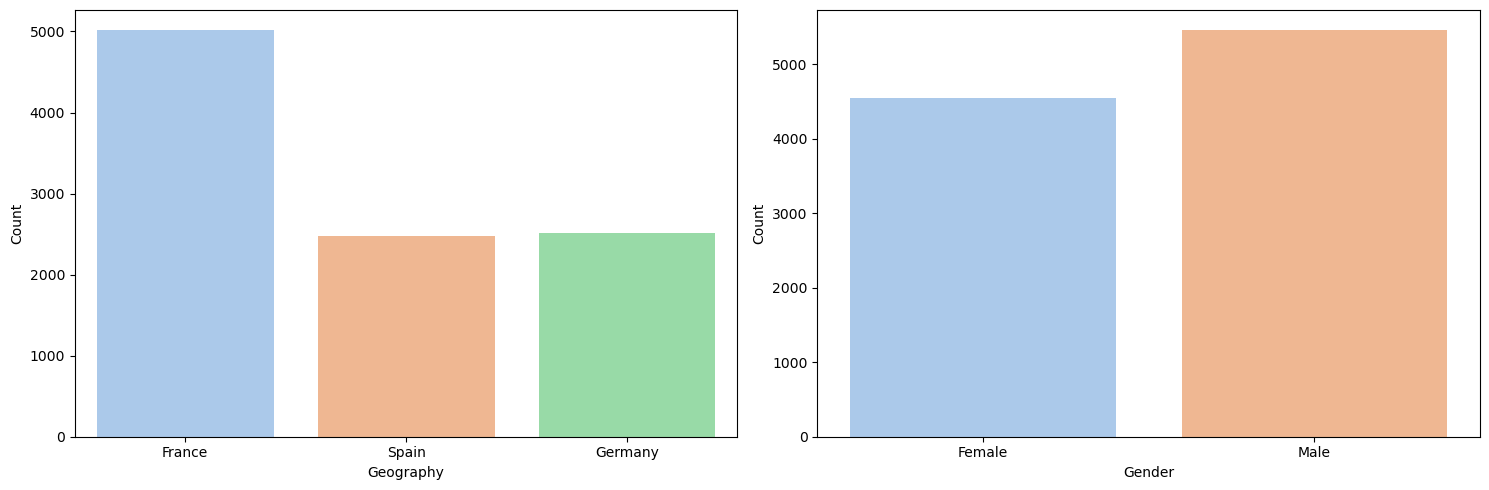

In [242]:
# Agora avaliando as variáveis categóricas, exceto Surname.
categorical_vars = ["Geography", "Gender"]

sns.set_palette("pastel")

# Configuração do layout dos subplots
num_plots = len(categorical_vars)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Loop para criar os gráficos de barras para cada variável
for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Ajuste para lidar com subplot único
    sns.countplot(data=df_abandono, x=var, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel("Count")

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

* Aqui é possível observar que a maioria dos clietes é da França, enquanto Espanha e Alemanha tem uma quantidade semelhante de clientes.
* Quanto ao gênero, observa-se que a maioria é do gênero masculino.

<a id='number_4'></a>
### 4. Exploratory Data Analysis (EDA) - Bivariate Analysis 

Agora na análise bivariada observaremos a relação entre duas variáveis e buscaremos entender a associação ou influência entre elas.

Nesse contexto, será analisado como cada variável independente se relaciona com a variável de destino. A análise bivariada é útil para identificar quais variáveis podem ter um impacto significativo na variável de destino e ajudar na seleção de recursos relevantes para modelos preditivos ou análises mais avançadas.

<a id='p_pearson'></a>

In [142]:
numeric_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
target_variable = 'Exited'
alpha = 0.05

for variable in numeric_variables:
    data = df_abandono[variable]
    target = df_abandono[target_variable]
    
    correlation, p_value = stats.pearsonr(data, target)
    
    print(f"Variável: {variable}")
    print(f"Correlação de Pearson: {correlation:.3f}")
    print(f"Valor-P: {p_value:.3f}")
    
    if p_value < alpha:
        print("A correlação é estatisticamente significativa.")
    else:
        print("Não há evidências de correlação estatisticamente significativa.")
    
    print("--------------------")

Variável: CreditScore
Correlação de Pearson: -0.027
Valor-P: 0.007
A correlação é estatisticamente significativa.
--------------------
Variável: Age
Correlação de Pearson: 0.285
Valor-P: 0.000
A correlação é estatisticamente significativa.
--------------------
Variável: Tenure
Correlação de Pearson: -0.014
Valor-P: 0.162
Não há evidências de correlação estatisticamente significativa.
--------------------
Variável: Balance
Correlação de Pearson: 0.119
Valor-P: 0.000
A correlação é estatisticamente significativa.
--------------------
Variável: NumOfProducts
Correlação de Pearson: -0.048
Valor-P: 0.000
A correlação é estatisticamente significativa.
--------------------
Variável: EstimatedSalary
Correlação de Pearson: 0.012
Valor-P: 0.226
Não há evidências de correlação estatisticamente significativa.
--------------------


Analise:

* A variável "CreditScore" apresenta uma correlação negativa muito fraca (-0,027) com o target, mas essa correlação é estatisticamente significativa. Isso sugere que clientes com pontuações de crédito mais baixas têm uma tendência ligeiramente maior de abandonar o serviço.

* A variável "Age" mostra uma correlação positiva moderada (0,285) com o target, e essa correlação é estatisticamente significativa. Isso indica que clientes mais jovens têm maior probabilidade de abandonar o serviço.

* A variável "Tenure" não apresenta evidências de correlação estatisticamente significativa com o target variable. Isso sugere que a quantidade de tempo que um cliente permanece no serviço não tem impacto significativo em sua decisão de abandonar ou não.

* A variável "Balance" mostra uma correlação positiva moderada (0,119) com o target, e essa correlação é estatisticamente significativa. Isso sugere que clientes com saldos mais altos em suas contas têm uma tendência maior de abandonar o serviço.

* A variável "NumOfProducts" apresenta uma correlação negativa moderada (-0,048) com o target, e essa correlação é estatisticamente significativa. Isso indica que clientes com um número maior de produtos têm uma tendência ligeiramente menor de abandonar o serviço.

* A variável "EstimatedSalary" não apresenta evidências de correlação estatisticamente significativa com o target. Isso sugere que o salário estimado do cliente não tem um impacto significativo em sua decisão de abandonar ou não.


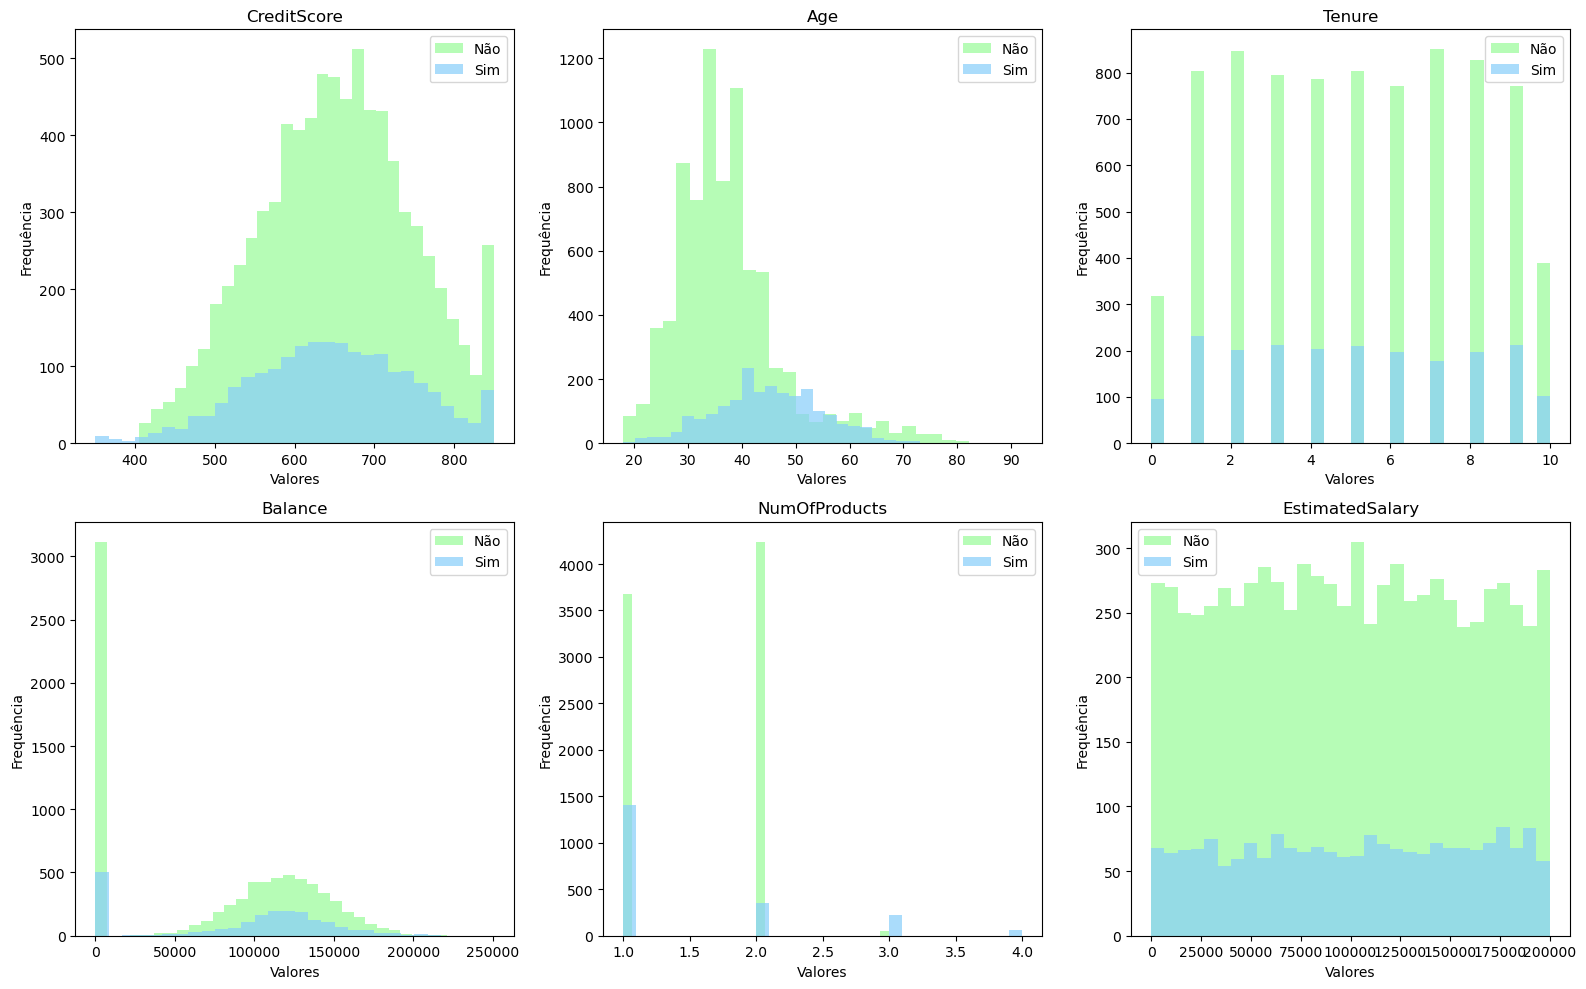

In [250]:
# Mapeando os valores da coluna 'Exited' para 'Não' e 'Sim'
df_abandono['Exited'] = df_abandono['Exited'].replace([0, 1], ['Não', 'Sim'])

# Selecionando as colunas numéricas para visualização
numeric_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Definindo as cores para cada categoria
colors = [mcolors.CSS4_COLORS['palegreen'], mcolors.CSS4_COLORS['lightskyblue']]

# Criando uma figura com 2 linhas e 3 colunas de subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Iterando sobre as variáveis numéricas e os subplots correspondentes
for i, variable in enumerate(numeric_variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Plotando o histograma para a categoria 'Não'
    ax.hist(df_abandono[df_abandono['Exited'] == 'Não'][variable], bins=30, color=colors[0], alpha=0.7, label='Não')

    # Plotando o histograma para a categoria 'Sim'
    ax.hist(df_abandono[df_abandono['Exited'] == 'Sim'][variable], bins=30, color=colors[1], alpha=0.7, label='Sim')

    ax.set_title(variable)
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')

    ax.legend()

# Ajustando a disposição dos subplots
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Com base nas análises dos histogramas das variáveis numéricas em relação à variável 'Exited', podemos fazer as seguintes observações:

* Score de crédito (CreditScore): A evasão de clientes é mais comum em pessoas com Score de crédito baixo.

* Idade (Age): Observa-se que pessoas mais velhas, acima de 50 anos, têm uma taxa de evasão maior.

* Saldo (Balance): Nota-se que pessoas com saldo nulo têm uma taxa de evasão maior.

* Número de produtos (NumOfProducts): Quanto ao número de produtos, observa-se que quanto mais produtos a pessoa adquiriu, maior foi a taxa de evasão.

Essas observações sugerem que essas variáveis podem ter uma influência na evasão de clientes.

Os resultados encontrados aqui, corroboram com os resultados obtidos anteriormente, onde encontramos os coeficiente de correlação de Pearson e o p-valor. > <a href='#p_pearson'> Correlação de Pearson e p-valor. </a> <

Se tornando assim, neste momento, as variáveis numéricas: CreditScore, Age, Balance, NumOfProducts, importantes para a analise e predição da evasão de clientes.

#### Agora analisaremos as variáveis categóricas



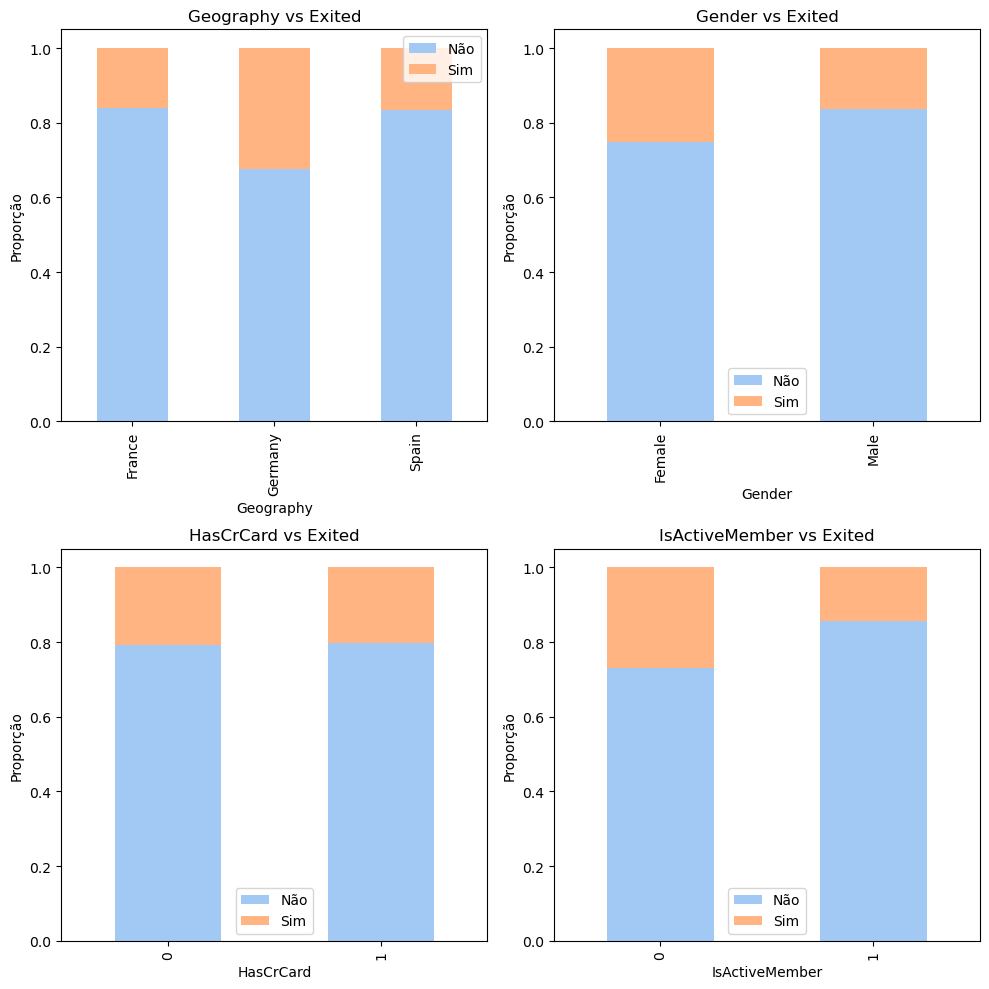

In [244]:
# Definindo a paleta de cores personalizada
sns.set_palette("pastel")

# Selecionando as variáveis categóricas para visualização
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
target_variable = 'Exited'

# Criando uma figura com 2 colunas e o número adequado de subplots
fig, axes = plt.subplots(len(cat_vars)//2 + len(cat_vars)%2, 2, figsize=(10, len(cat_vars)*2.5))

# Iterando sobre as variáveis categóricas e os subplots correspondentes
for i, variable in enumerate(cat_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Contando a contagem de cada categoria em relação à variável 'Exited'
    count_data = df_abandono.groupby([variable, target_variable]).size().unstack()

    # Calculando a proporção de cada categoria em relação ao total de clientes para cada valor de 'Exited'
    proportion_data = count_data.div(count_data.sum(axis=1), axis=0)

    # Plotando o gráfico de barras empilhadas
    proportion_data.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'{variable} vs {target_variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Proporção')
    ax.legend(['Não', 'Sim'])

# Ajustando a disposição dos subplots e o espaçamento vertical
plt.tight_layout(h_pad=1)

# Exibindo o gráfico
plt.show()

Aqui nas variáveis categóricas vemos uma evasão maior para casos onde o membro era inativo, do sexo feminino, e do país Alemanha. A variavel, 'HasCrCard', aparenta não ter influencia na evasão. 

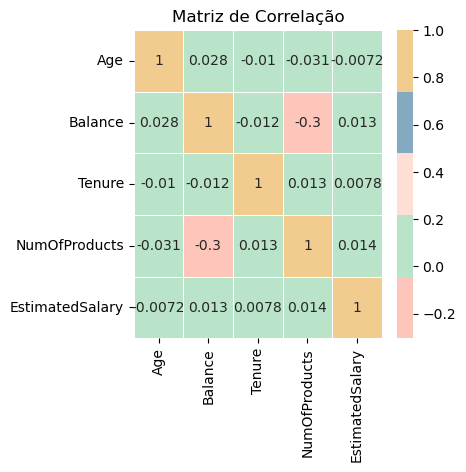

In [256]:
# Definindo a paleta de cores personalizada
custom_palette = ['#FEC5BB', '#B9E4C9', '#FFDFD3', '#84A9C0', '#F2CC8F']

# Selecionando as variáveis para a matriz de correlação
correlation_vars = ['Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary']

# Calculando a matriz de correlação
correlation_matrix = df_abandono[correlation_vars].corr()

# Criando uma figura e um eixo para o gráfico com tamanho menor
fig, ax = plt.subplots(figsize=(4, 4))

# Plotando a matriz de correlação como um mapa de calor com a paleta de cores personalizada
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, linewidths=0.5, ax=ax)

# Definindo o título do gráfico
ax.set_title('Matriz de Correlação')

# Exibindo o gráfico
plt.show()

Após análise da matriz de correlação, observou-se que nenhuma variável apresentou uma correlação significativa entre si. A única correlação identificada foi entre o número de produtos e o saldo, sendo esta uma correlação negativa de magnitude 0,3, indicando uma relação fraca entre essas variáveis.

<a id='number_5'></a>
### 5. Pré processamento

Aqui nesta etapa, os dados passam por um pré processamento, para assim serem implementados no modelo de Machine Learning para realizar predições. Realizaremos o pré processamento do df_clientes também.

In [218]:
# Instanciar o objeto LabelEncoder
le = LabelEncoder()

# Aplicar o LabelEncoder à coluna 'Exited'
df_abandono['Exited'] = le.fit_transform(df_abandono['Exited'])

# Separar as variáveis independentes e dependentes
y = df_abandono['Exited']  # Variável dependente
X = df_abandono.drop('Exited', axis=1)  # Variáveis independentes

In [223]:
X

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [220]:
tipos_colunas = df_abandono.dtypes
print(tipos_colunas)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [235]:
X

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


Aqui as variáveis numéricas estão em diferentes escalas, então é recomendado realizar uma etapa de pré-processamento chamada normalização ou padronização dos dados. Isso ajuda a colocar todas as variáveis em uma escala semelhante. Aqui será usado a normalização Min-Max.

Para lidar com variáveis categóricas em um modelo de machine learning, uma abordagem comum é utilizar o método de codificação de variáveis dummies. Esse método envolve a criação de variáveis binárias (0 ou 1) para cada categoria da variável categórica, e será efetuado aqui.

In [221]:
# Retirando a coluna Surname pois não é importante nesse estudo
X = X.drop('Surname', axis=1)

In [150]:
x_cont = ['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

# Variáveis Contínuas
x_cont = X[x_cont]

# Variáveis Categóricas
x_cat = X.drop(['RowNumber', 'CustomerId'] + x_cont.columns.tolist(), axis=1)

# Variáveis Categóricas - Dummies
x_dummies = pd.get_dummies(x_cat, drop_first=True)

# Normalização Min-Max das variáveis contínuas
scaler = MinMaxScaler()
x_cont_norm = pd.DataFrame(scaler.fit_transform(x_cont), columns=x_cont.columns)

# Concatenar as variáveis contínuas normalizadas com as categóricas codificadas
X_processed = pd.concat([x_cont_norm, x_dummies], axis=1)

In [151]:
x_cat

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,1,1,1
1,Spain,Female,1,0,1
2,France,Female,3,1,0
3,France,Female,2,0,0
4,Spain,Female,1,1,1
...,...,...,...,...,...
9995,France,Male,2,1,0
9996,France,Male,1,1,1
9997,France,Female,1,0,1
9998,Germany,Male,2,1,0


In [152]:
X_processed

,CreditScore,Balance,Age,EstimatedSalary,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.000000,0.324324,0.506735,0.2,1,1,1,0,0,0
1,0.516,0.334031,0.310811,0.562709,0.1,1,0,1,0,1,0
2,0.304,0.636357,0.324324,0.569654,0.8,3,1,0,0,0,0
3,0.698,0.000000,0.283784,0.469120,0.1,2,0,0,0,0,0
4,1.000,0.500246,0.337838,0.395400,0.2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5,2,1,0,0,0,1
9996,0.332,0.228657,0.229730,0.508490,1.0,1,1,1,0,0,1
9997,0.718,0.000000,0.243243,0.210390,0.7,1,0,1,0,0,0
9998,0.844,0.299226,0.324324,0.464429,0.3,2,1,0,1,0,1


Agora os dados estão todos normalizados e ajustados, hora de começar a modelagem.

<a id='number_6'></a>
### 6. Aplicação de Machine Learning para predição de Churn

Nesse problema que estamos resolvendo, que é a predição de Churn, utilizaremos modelos de classificação. A previsão do Churn ocorre de maneira binária, sim ou não, por isso o motivo da escolha. 

In [154]:
# Calcular a contagem de evasão na coluna 'Exited'
counts = df_abandono['Exited'].value_counts()

# Calcular a porcentagem de cada valor
percentages = counts / len(df_abandono) * 100

# Exibir o resultado
print(percentages)

0    79.63
1    20.37
Name: Exited, dtype: float64


Nesse momento observamos um desequilíbrio de classe, onde uma classe é significativamente menor em comparação com a outra. Deste modo, é importante utilizar de algoritmos adequados para lidar com esse desequilibrio de classe.  Então escolheu-se 3:

* Random Forest: O algoritmo Random Forest é conhecido por lidar bem com desequilíbrio de classes. Ele utiliza uma combinação de árvores de decisão e amostragem aleatória para criar um modelo robusto e eficiente.

* XGBoost: O XGBoost é um algoritmo de boosting que também pode ser eficaz para lidar com desequilíbrio de classes. Ele usa um conjunto de modelos fracos e os combina para formar um modelo final mais forte, dando mais peso às classes minoritárias durante o treinamento.

* SVM (Support Vector Machines): Os SVMs são algoritmos de aprendizado supervisionado que podem ser usados para resolver problemas de classificação binária, incluindo desequilíbrio de classes. Eles são capazes de aprender fronteiras de decisão complexas e podem ser ajustados para dar mais importância às classes minoritárias.

In [155]:
X_processed

,CreditScore,Balance,Age,EstimatedSalary,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.000000,0.324324,0.506735,0.2,1,1,1,0,0,0
1,0.516,0.334031,0.310811,0.562709,0.1,1,0,1,0,1,0
2,0.304,0.636357,0.324324,0.569654,0.8,3,1,0,0,0,0
3,0.698,0.000000,0.283784,0.469120,0.1,2,0,0,0,0,0
4,1.000,0.500246,0.337838,0.395400,0.2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5,2,1,0,0,0,1
9996,0.332,0.228657,0.229730,0.508490,1.0,1,1,1,0,0,1
9997,0.718,0.000000,0.243243,0.210390,0.7,1,0,1,0,0,0
9998,0.844,0.299226,0.324324,0.464429,0.3,2,1,0,1,0,1


* O parâmetro test_size define a proporção dos dados destinados ao conjunto de teste (25% neste caso)
* O parâmetro random_state garante a reprodutibilidade dos resultados

In [237]:
# Dividindo os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_processed, y, test_size=0.25, random_state=1)

#### O primeiro algoritmo a ser utilizado será o Xgboost

Primeiro, será feita a modelagem com os parâmetros padroes do Xgboost. Primeiro será avaliado o desempenho do modelo usando métricas de avaliação relevantes então, se necessário, os hiperparametros serão tunados.

In [ ]:
# Criando uma instância do classificador XGBoost com os parâmetros padrão:
xgb_teste = XGBClassifier()
#Treinando o modelo usando os dados de treinamento:
xgb_teste.fit(x_treino, y_treino)
#Previsões com o modelo testado na base de teste
y_pred = xgb_teste.predict(x_teste)
#Avalia o desempenho do modelo usando as métricas
accuracy = accuracy_score(y_teste, y_pred)
precision = precision_score(y_teste, y_pred)
recall = recall_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [172]:
y_pred_xgb = xgb_teste.predict(x_teste)
print(classification_report(y_teste, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1980
           1       0.75      0.51      0.61       520

    accuracy                           0.86      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



Nas métricas de avaliação do modelo XGBoost, podemos observar o seguinte:

Precision (Precisão): A precisão para a classe 0 (clientes que não abandonaram) é de 88%, o que indica que o modelo é capaz de identificar corretamente 88% dos clientes que realmente não abandonaram o serviço. Para a classe 1 (clientes que abandonaram), a precisão é de 75%, o que significa que o modelo classifica corretamente 75% dos clientes que realmente abandonaram o serviço.

Recall (Revocação): O recall para a classe 0 é de 96%, o que indica que o modelo é capaz de recuperar corretamente 96% dos clientes que realmente não abandonaram o serviço. Já para a classe 1, o recall é de 51%, o que significa que o modelo identifica corretamente 51% dos clientes que realmente abandonaram o serviço.

F1-score: O F1-score é uma média harmônica entre a precisão e o recall, que fornece uma medida geral do desempenho do modelo. Para a classe 0, o F1-score é de 92%, indicando um bom equilíbrio entre precisão e recall. Já para a classe 1, o F1-score é de 61%, sugerindo que o modelo pode estar encontrando mais dificuldades em identificar corretamente os clientes que abandonaram o serviço (provalmente devido ao desbalanço da variável target).

Accuracy (Acurácia): A acurácia geral do modelo é de 86%, o que indica que ele classifica corretamente 86% de todos os clientes no conjunto de teste.

Em resumo, o modelo XGBoost apresenta uma boa precisão e recall para a classe de clientes que não abandonaram o serviço (classe 0), indicando que ele é capaz de identificar corretamente a maioria desses clientes. No entanto, para a classe de clientes que abandonaram o serviço (classe 1), o desempenho do modelo é um pouco inferior, com uma precisão e recall mais baixos. Isso sugere que o modelo pode estar encontrando dificuldades em identificar corretamente os clientes que realmente abandonaram o serviço.

Portanto, será efetuado um teste de hiperparâmetros utilizando o grid search a fim de melhorar as métricas. Essa abordagem envolve a definição de um conjunto de valores para cada parâmetro e, em seguida, treinar e avaliar o modelo para todas as combinações possíveis. É possível utilizar validação cruzada para avaliar o desempenho em diferentes combinações de parâmetros e escolher aquela que obtém os melhores resultados.

In [257]:
# Definir os hiperparâmetros a serem testados
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'n_estimators': [200, 300, 400],
    'scale_pos_weight': [2, 4, 5]
}
# Criar uma instância do classificador XGBoost
xgb = XGBClassifier()

# Criar uma instância do GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', cv=5)

# Treinar o modelo usando GridSearchCV
grid_search.fit(x_treino, y_treino)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Criar uma nova instância do classificador XGBoost com os melhores hiperparâmetros
xgb_best = XGBClassifier(**best_params)

# Treinar o modelo com os melhores hiperparâmetros
xgb_best.fit(x_treino, y_treino)

# Fazer previsões com o modelo otimizado
y_pred_xgbhp = xgb_best.predict(x_teste)

# Avaliar o desempenho do modelo otimizado
accuracy = accuracy_score(y_teste, y_pred_xgbhp)
precision = precision_score(y_teste, y_pred_xgbhp)
recall = recall_score(y_teste, y_pred_xgbhp)
f1 = f1_score(y_teste, y_pred_xgbhp)

print("Melhores hiperparâmetros encontrados:", best_params)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(classification_report(y_teste, y_pred_xgbhp))

Melhores hiperparâmetros encontrados: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'scale_pos_weight': 5}
Acurácia: 0.7592
Precisão: 0.4556277056277056
Recall: 0.8096153846153846
F1-score: 0.5831024930747922
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1980
           1       0.46      0.81      0.58       520

    accuracy                           0.76      2500
   macro avg       0.70      0.78      0.71      2500
weighted avg       0.84      0.76      0.78      2500



Ao efetuar o ajuste nos hiperparametros, encontramos melhora nas medidas de validação.

#### Random Forest

In [115]:
# Criar uma instância do modelo
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
# Treinar o modelo nos dados de treinamento
rf.fit(x_treino, y_treino)
# Fazer previsões para os dados de teste
y_pred_rf = rf.predict(x_teste)

In [116]:
print(classification_report(y_teste, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1980
           1       0.79      0.47      0.59       520

    accuracy                           0.86      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.86      0.85      2500



O resultado apresentado indica que o modelo Random Forest alcançou uma precisão média de 86% e um recall médio de 72% em um conjunto de dados de teste.

Olhando para as métricas individuais por classe, podemos ver que o modelo teve um desempenho melhor na classe 0, com uma precisão de 87% e um recall de 97%. Isso indica que o modelo foi capaz de identificar corretamente a maioria dos exemplos da classe 0. No entanto, o desempenho na classe 1 foi inferior, com uma precisão de 79% e um recall de 47%. Isso sugere que o modelo teve mais dificuldade em identificar corretamente os exemplos da classe 1.

O que pode indicar que ele pode estar sofrendo interferência da analise desbalanceada.

#### SVM

In [113]:
# Criar uma instância do classificador SVM
svm = SVC()

# Treinar o modelo usando os dados de treinamento
svm.fit(x_treino, y_treino)

# Fazer previsões com o modelo treinado
y_pred_svm = svm.predict(x_teste)

# Avaliar o desempenho do modelo usando métricas
print(classification_report(y_teste, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1980
           1       0.85      0.34      0.48       520

    accuracy                           0.85      2500
   macro avg       0.85      0.66      0.70      2500
weighted avg       0.85      0.85      0.82      2500



Em um problema de desbalanceamento de classes, a métrica mais afetada geralmente é o recall (revocação), especificamente para a classe minoritária. O recall mede a proporção de exemplos positivos que foram corretamente identificados pelo modelo, ou seja, a capacidade do modelo de detectar corretamente os exemplos positivos. Por isso iremos fazer matrizes de confusão para comparar o recall dos modelos.

In [ ]:
# Matriz de Confusão - Random Forest
cm_rf = confusion_matrix(y_teste, y_pred_rf)
scaled_cm_rf = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]  # Normaliza os valores
sns.heatmap(scaled_cm_rf, annot=True, cmap='Blues', fmt='.2f')  # Formata os valores com duas casas decimais
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Valor Preditivo')
plt.ylabel('Valor Real')
plt.show()

# Matriz de Confusão - XGBoost
cm_xgb = confusion_matrix(y_teste, y_pred_xgb)
scaled_cm_xgb = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]  # Normaliza os valores
sns.heatmap(scaled_cm_xgb, annot=True, cmap='Blues', fmt='.2f')  # Formata os valores com duas casas decimais
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Valor Preditivo')
plt.ylabel('Valor Real')
plt.show()

# Matriz de Confusão - SVM
cm_svm = confusion_matrix(y_teste, y_pred_svm)
scaled_cm_svm = cm_svm.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]  # Normaliza os valores
sns.heatmap(scaled_cm_svm, annot=True, cmap='Blues', fmt='.2f')  # Formata os valores com duas casas decimais
plt.title('Matriz de Confusão - SVM')
plt.xlabel('Valor Preditivo')
plt.ylabel('Valor Real')
plt.show()

Como XGboost e Random Forest apresentaram as melhores métricas, aplicar-se-á um método de ensemble no XGBoost e Random Forest, utilizando o classificador VotingClassifier do scikit-learn. Ele permite combinar os modelos em um único ensemble, onde as previsões são feitas por voto majoritário.

In [ ]:
# Voting Classifier with soft voting 
voto = VotingClassifier(estimators=[('rf', rf),('xgb',xgb)], voting='soft')
voto = voto.fit(x_treino,y_treino)
y_predito = voto.predict(x_teste)
print(classification_report(y_teste, y_predito))

#### Predição da Coluna 'Exited' no df_clientes.

Agora que o modelo já está treinado e funcionando, será aplicado ao df_cliente para prever a coluna Exited. Porém, primeiro é necessária o pré processamento dos dados, de modo a garantir que os dados de entrada para o modelo estão no mesmo formato.

In [40]:
df_cliente

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,504,Spain,Male,28,10,109291.36,1,1,1,187593.15
...,...,...,...,...,...,...,...,...,...,...,...,...
995,10996,15730373,531,France,Female,34,10,118306.79,1,1,0,26493.05
996,10997,15716191,575,Germany,Male,49,2,136822.70,1,1,0,2487.74
997,10998,15673900,520,France,Female,74,4,0.00,1,0,0,26742.92
998,10999,15581432,675,Spain,Male,23,8,0.00,2,0,0,162342.21


In [197]:
x_cont = ['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

# Variáveis Contínuas
x_cont_cliente = df_cliente[x_cont]

# Variáveis Categóricas
x_cat_cliente = df_cliente.drop(['CustomerId'] + x_cont_cliente.columns.tolist(), axis=1)

# Variáveis Categóricas - Dummies
x_dummies_cliente = pd.get_dummies(x_cat_cliente, drop_first=True)

# Normalização Min-Max das variáveis contínuas
x_cont_norm_cliente = pd.DataFrame(scaler.transform(x_cont_cliente), columns=x_cont_cliente.columns)

# Concatenar as variáveis contínuas normalizadas com as categóricas codificadas
x_processed_cliente = pd.concat([x_cont_norm_cliente, x_dummies_cliente], axis=1)

In [198]:
x_processed_cliente

,CreditScore,Balance,Age,EstimatedSalary,Tenure,RowNumber,NumOfProducts,HasCrCard,IsActiveMember,Surname_Adorno,...,Surname_Zaitsev,Surname_Zaitseva,Surname_Zetticci,Surname_Zikoranaudodimma,Surname_Zito,Surname_Zox,Surname_Zuyev,Geography_Germany,Geography_Spain,Gender_Male
0,0.430,0.000000,0.175676,0.102167,0.1,10001,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.438,0.000000,0.216216,0.020174,0.4,10002,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.638,0.000000,0.027027,0.644197,0.7,10003,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.688,0.690541,0.283784,0.406446,0.4,10004,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.308,0.435601,0.135135,0.937997,1.0,10005,1,1,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.362,0.471533,0.216216,0.132420,1.0,10996,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0.450,0.545332,0.418919,0.012382,0.2,10997,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
997,0.340,0.000000,0.756757,0.133669,0.4,10998,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0.650,0.000000,0.067568,0.811731,0.8,10999,2,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [211]:
# Extrair as features do x_processed_cliente
x_cliente = x_processed_cliente[x_treino.columns]

# Fazer as previsões usando o modelo de ensemble
y_pred_cliente = voto.predict(x_cliente)

# Criar um DataFrame com as colunas RowNumber e predictedValues
df_resultado = pd.DataFrame({'RowNumber': x_processed_cliente['RowNumber'], 'predictedValues': y_pred_cliente})

# Salvar o resultado em um arquivo CSV
df_resultado.to_csv('resultado_final.csv', index=False)

In [212]:
# Dados preditos
df_resultado

,RowNumber,predictedValues
0,10001,0
1,10002,0
2,10003,0
3,10004,0
4,10005,0
...,...,...
995,10996,0
996,10997,1
997,10998,0
998,10999,0


In [215]:
# Calcular a contagem de evasão na coluna 'Exited' prevista
counts_p = df_resultado['predictedValues'].value_counts()

# Calcular a porcentagem de cada valor
percentages_p = counts_p / len(df_resultado) * 100

# Exibir o resultado
print(percentages_p)

0    87.9
1    12.1
Name: predictedValues, dtype: float64
